In [1]:
import pint.toa as toa
import pint.models as models
import pint.fitter as fit

import matplotlib.pyplot as plt

import astropy.units as u

from utils import *

## План
+ Пояснение импорта
+ Чтение файла TIM
+ Информация по файлу TIM
+ Чтение файла параметров
+ Информация по файлу параметров
+ Фитинг (аналог tempo -f file.par file.tim)
+ Визуализация остаточных уклонений
+ Итоговые парамеры после фитинга
+ Дополнительные утилиты (Файл utils.py и работа с ним)


In [2]:
tim_file = toa.get_TOAs("1112.tim")

Data points out of range in clock file '/home/andr/.pyenv/versions/miniconda3-4.7.12/lib/python3.7/site-packages/pint/data/runtime/time.dat'
No ephemeris provided to TOAs object or compute_TDBs. Using DE421


In [4]:
mod_file = models.get_model("1112.par")

In [7]:
our_fit = fit.WLSFitter(tim_file, mod_file)
our_fit.fit_toas()

179770.09866076195613

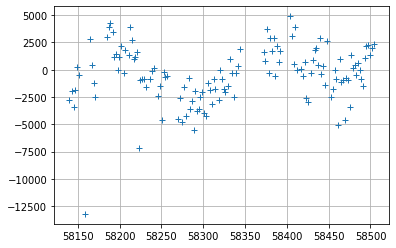

In [17]:
plt.plot(tim_file.get_mjds(), our_fit.resids.time_resids.to(u.us), '+')
plt.grid()

In [20]:
toa_part = get_interval_toas(tim_file, 58200, 58400)
part_fit = fit.WLSFitter(toa_part, mod_file)
part_fit.fit_toas()

32052.609858133044327

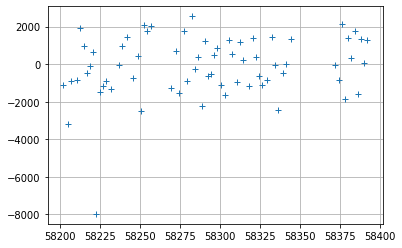

In [21]:
plt.plot(toa_part.get_mjds(), part_fit.resids.time_resids.to(u.us), '+')
plt.grid()

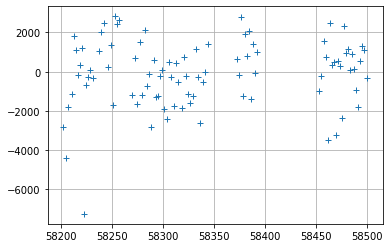

In [22]:
toa_parts = get_intervals_toas(tim_file, [(58200, 58400), (58450, 58500)])
parts_fit = fit.WLSFitter(toa_parts, mod_file)
parts_fit.fit_toas()

plt.plot(toa_parts.get_mjds(), parts_fit.resids.time_resids.to(u.us), '+')
plt.grid()

In [23]:
clear_toa = get_toas_by_residuals(tim_file, our_fit.resids.time_resids.to(u.us), 5000, -5000, u.us)

In [25]:
cleared_toa = exclude_toas(tim_file, clear_toa)

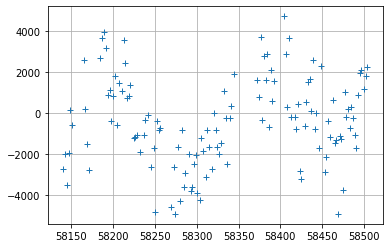

In [26]:
clear_fit = fit.WLSFitter(cleared_toa, mod_file)
clear_fit.fit_toas()

plt.plot(cleared_toa.get_mjds(), clear_fit.resids.time_resids.to(u.us), '+')
plt.grid()

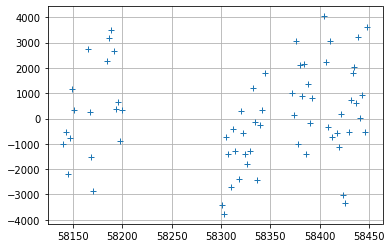

In [28]:
toa_ex_parts = exclude_intervals_toas(cleared_toa, [(58200, 58300), (58450, 585600)])
ex_parts_fit = fit.WLSFitter(toa_ex_parts, mod_file)
ex_parts_fit.fit_toas()

plt.plot(toa_ex_parts.get_mjds(), ex_parts_fit.resids.time_resids.to(u.us), '+')
plt.grid()